# Day 06 Pre-Class Assignment:<br>LU Decomposition and Jacobi Iterative Method

### <p style="text-align: right;"> &#9989; Cesarine Graham</p>

## Goals of this assignment

The primary goal of this assignment is expand our ability to manipulate matrices:

* Learn about how to use LU decomposition to solve linear equations more efficiently
* Use the Jacobi iterative method

## Assignment instructions

Upload the assignment to Gradescope before noon the day of the next class.


## Part 0: Solving Systems of Linear Equations
Linear algebra pops up almost everywhere in physics.
Therefore, matrix-related techniques will be used repeatedly in many physics problems.
This week, we have already learned about the how to solve a system of linear equations with simple upper or lower-triangular form using substitution, and how to solve the general case via Gaussian elimination.
In Day 6, we will continue to learn about other ways of solving the linear systems: LU decomposition and the Jacobi iterative method.

---
## Part 1: LU Decomposition
LU decomposition takes advantage of the work that we do during Gaussian elimination to create an easier-to-solve problem when we want to reuse the matrix for multiple right-hand sides. We do this by rewriting the original matrix $\mathbf{A}$ as a product of a lower- and an upper-triangular matrix, denoted $\mathbf{L}$ and  $\mathbf{U}$. So the original equation

$$\mathbf{A} \mathbf{x} = \mathbf{b}$$

becomes

$$\mathbf{L}(\mathbf{U} \mathbf{x}) = \mathbf{b}.$$

If we denote $\mathbf{U} \mathbf{x}=\mathbf{y}$, we now can solve for $\mathbf{x}$ by solving the two simpler equations

$$\mathbf{L}\mathbf{y}= \mathbf{b}
\qquad \text{and} \qquad
\mathbf{U} \mathbf{x}=\mathbf{y}.$$

Recall that we already have the needed functions in the previous in-class, `forsub(L,b)` and `backsub(U,b)`, to solve these equations. Notice also that unlike Gaussian elimination, we do not change the vector $\mathbf{b}$, so we can easily replace it with a different right-hand side as necessary, a useful feature in many physics applications.

Now, the only question remaining is how we find $\mathbf{L}$ and $\mathbf{U}$ for a given $\mathbf{A}$.

### Task 1.1: Watch the video below to learn how to get  $\mathbf{L}$ and  $\mathbf{U}$ for a $3 \times 3$ example

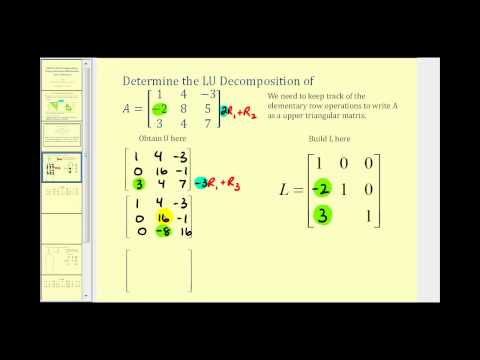

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("UlWcofkUDDU",width=640,height=340)


### Task 1.2: Apply to an example
Following the steps in the video, let's try to find $\mathbf{L}$ and $\mathbf{U}$ for

$$\mathbf{A} =
  \begin{bmatrix}
    2  &  1  & 1  \\
    1  &  1  & -2 \\
    1  &  2  & 1  \\
  \end{bmatrix}.$$

Create a new Markdown cell below, write down your $\mathbf{L}$ and $\mathbf{U}$ matrices, and explain how you can check your solution is correct.
(If it's incorrect, go back and check your solutions for typos or other issues.)

<font color='blue'>

We start by performing Gaussian elimination to obtain an upper-triangular matrix:

$\begin{bmatrix}
2 & 1 & 1 \\
0 & 0.5 & -2.5 \\
0 & 0 & 8 \\
\end{bmatrix}$

$\mathbf{L}$ =
$\begin{bmatrix}
1 & 0 & 0 \\
0.5 & 1 & 0 \\
0.5 & 3 & 1 \\
\end{bmatrix}$

$\mathbf{U}$ =
$\begin{bmatrix}
2 & 1 & 1 \\
0 & 0.5 & -2.5 \\
0 & 0 & 8 \\
\end{bmatrix}$

To check if the decomposition is correct, multiply $\mathbf{L}$ and $\mathbf{U}$. This multiplication should give us the original matrix $\mathbf{A}$. If the result matches $\mathbf{A}$, then our $\mathbf{L}$ and $\mathbf{U}$ matrices are correct.

$\mathbf{L} \times \mathbf{U} =
\begin{bmatrix}
1 & 0 & 0 \\
0.5 & 1 & 0 \\
0.5 & 3 & 1 \\
\end{bmatrix}
\times
\begin{bmatrix}
2 & 1 & 1 \\
0 & 0.5 & -2.5 \\
0 & 0 & 8 \\
\end{bmatrix}
=
\begin{bmatrix}
2  &  1  & 1  \\
1  &  1  & -2 \\
1  &  2  & 1  \\
\end{bmatrix}$
    
</font>

### Task 1.3: Observation
From the example you worked on in Task 1.2 and the example you see in the video, what do you observe about the pattern to obtain $\mathbf{L}$ and $\mathbf{U}$ matrix?
Create a new Markdown cell and write down your observations.

<font color='blue'>
    
- The diagonal elements are always 1, and the values below the diagonals come from the Gaussian elimination multipliers.
- The pattern in $\mathbf{U}$ is otained directly from Gaussian elimination.
- THe elements below the diagonal are all zeros after elimination.
- $\mathbf{A}$ can be decomposed into the product of $\mathbf{L}$ and $\mathbf{U}$: $\mathbf{A} = \mathbf{L} \times \mathbf{U}$.
- $\mathbf{L}$ and $\mathbf{U}$ can be used to solve linear systems with different right-hand sides without having to perform another decompisition. 
    
</font>

### Task 1.4: The general  $3 \times 3$ case

Following the steps in the video, and let's try to find $\mathbf{L}$ and $\mathbf{U}$ for
$$\mathbf{A} =
  \begin{bmatrix}
    a_{00}  &  a_{01}  & a_{02} \\
    a_{10}  &  a_{11}  & a_{12} \\
    a_{20}  &  a_{21}  & a_{22} \\
  \end{bmatrix}.$$

Create a new Markdown cell below and write down your $\mathbf{L}$ and $\mathbf{U}$ matrices in terms of $a_{ij}$ with $i$, $j$ being integer indices running from 1 to 3.

Apply your formula to the example in Task 1.2 to check whether your solution is correct; show your check in a new code cell below.

<font color='blue'>

For a $3 \times 3$ matrix:

$$\mathbf{L} =
\begin{bmatrix}
1 & 0 & 0 \\
l_{21} & 1 & 0 \\
l_{31} & l_{32} & 1 \\
\end{bmatrix}$$

$$\mathbf{U} =
\begin{bmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33} \\
\end{bmatrix}$$

where the elements $l_{ij}$ and $u_{ij}$ in terms of $a_{ij}$ are:

1. $u_{11} = a_{00}$
2. $u_{12} = a_{01}$
3. $u_{13} = a_{02}$
4. $u_{22} = a_{11} - l_{21}u_{12}$
5. $u_{23} = a_{12} - l_{21}u_{13}$
6. $u_{33} = a_{22} - l_{31}u_{13} - l_{32}u_{23}$
7. $l_{21} = \frac{a_{10}}{u_{11}}$
8. $l_{31} = \frac{a_{20}}{u_{11}}$
9. $l_{32} = \frac{a_{21} - l_{21}u_{12}}{u_{22}}$

We will now apply this to the example matrix from 1.2:

$$\mathbf{A} =
  \begin{bmatrix}
    2  &  1  & 1  \\
    1  &  1  & -2 \\
    1  &  2  & 1  \\
  \end{bmatrix}.$$

We can now apply the formulas found above:

1. $u_{11} = a_{00} = 2$
2. $u_{12} = a_{01} = 1$
3. $u_{13} = a_{02} = 1$
4. $u_{22} = a_{11} - l_{21}u_{12} = 1 - \frac{1}{2} \times 1 = \frac{1}{2}$
5. $u_{23} = a_{12} - l_{21}u_{13} = -2 - \frac{1}{2} \times 1 = -\frac{5}{2}$
6. $u_{33} = a_{22} - l_{31}u_{13} - l_{32}u_{23} = 1 - \frac{1}{2} \times 1 - \frac{1}{2} \times (-\frac{5}{2}) = 8$
7. $l_{21} = \frac{a_{10}}{u_{11}} = \frac{1}{2}$
8. $l_{31} = \frac{a_{20}}{u_{11}} = \frac{1}{2}$
9. $l_{32} = \frac{a_{21} - l_{21}u_{12}}{u_{22}} = \frac{2 - \frac{1}{2} \times 1}{\frac{1}{2}} = 3$

We can substitute these values into the matrices $\mathbf{L}$ and $\mathbf{U}$ manually to check if the decomposition is correct, then multiply $\mathbf{L}$ and $\mathbf{U}$ to check if we obtain the original matrix $\mathbf{A}$:

$$\mathbf{L} \times \mathbf{U} =
\begin{bmatrix}
1 & 0 & 0 \\
\frac{1}{2} & 1 & 0 \\
\frac{1}{2} & 3 & 1 \\
\end{bmatrix}
\times
\begin{bmatrix}
2 & 1 & 1 \\
0 & \frac{1}{2} & -\frac{5}{2} \\
0 & 0 & 8 \\
\end{bmatrix}
=
\begin{bmatrix}
2 & 1 & 1 \\
1 & 1 & -2 \\
1 & 2 & 1 \\
\end{bmatrix}
$$

The result matches the original matrix $\mathbf{A}$, confirming that the decomposition is correct.
</font>

---
## Part 2: Jacobi Iterative Method

### Task 2.1: Watch this video to learn about the Jacobi method

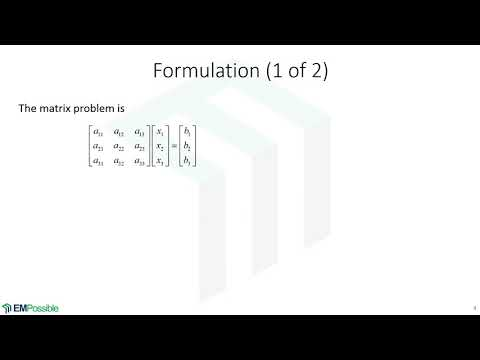

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("VH0TZlkZPRo",width=640,height=340)


### Task 2.2: An example

We can demonstrate Jacobi's method by this $4\times 4$ matrix problem. We assume a guess for the vector elements $x_i^{(0)}$, a guess which represents our first iteration. The new values are obtained from

$$
x_1^{(1)} =\frac{b_1-a_{12}x_2^{(0)} -a_{13}x_3^{(0)} - a_{14}x_4^{(0)}}{a_{11}} \nonumber
$$

$$
x_2^{(1)} =\frac{b_2-a_{21}x_1^{(0)} - a_{23}x_3^{(0)} - a_{24}x_4^{(0)}}{a_{22}} \nonumber
$$

$$
x_3^{(1)} =\frac{b_3- a_{31}x_1^{(0)} -a_{32}x_2^{(0)} -a_{34}x_4^{(0)}}{a_{33}} \nonumber
$$

$$
x_4^{(1)}=\frac{b_4-a_{41}x_1^{(0)} -a_{42}x_2^{(0)} - a_{43}x_3^{(0)}}{a_{44}},  \nonumber
$$

which after $k+1$ iterations reads

$$
x_1^{(k+1)} =\frac{b_1-a_{12}x_2^{(k)} -a_{13}x_3^{(k)} - a_{14}x_4^{(k)}}{a_{11}} \nonumber
$$

$$
x_2^{(k+1)} =\frac{b_2-a_{21}x_1^{(k)} - a_{23}x_3^{(k)} - a_{24}x_4^{(k)}}{a_{22}} \nonumber
$$

$$
x_3^{(k+1)} =\frac{b_3- a_{31}x_1^{(k)} -a_{32}x_2^{(k)} -a_{34}x_4^{(k)}}{a_{33}} \nonumber
$$

$$
x_4^{(k+1)}=\frac{b_4-a_{41}x_1^{(k)} -a_{42}x_2^{(k)} - a_{43}x_3^{(k)}}{a_{44}}.  \nonumber
$$

We can summarize the above equations in a compact form:
$$
x_i^{(k+1)}=\frac{b_i-\sum_{j\ne i}a_{ij}x_j^{(k)}}{a_{ii}}
$$

Take the matrix from Task 1.2, use a guess of $\mathbf{x}^{(0)}=[0,0,0]$, and write the solutions for the first 5 iterations below.

<font color='blue'>
    
$$\mathbf{A} =
  \begin{bmatrix}
    2  &  1  & 1  \\
    1  &  1  & -2 \\
    1  &  2  & 1  \\
  \end{bmatrix}.$$
    
### Iteration 1:
$$
\begin{align*}
x_1^{(1)} &= \frac{b_1 - a_{12}x_2^{(0)} - a_{13}x_3^{(0)}}{a_{11}} = \frac{2 - 1 \times 0 - 1 \times 0}{2} = 1 \\
x_2^{(1)} &= \frac{b_2 - a_{21}x_1^{(0)} - a_{23}x_3^{(0)}}{a_{22}} = \frac{1 - 1 \times 0 - (-2) \times 0}{1} = 1 \\
x_3^{(1)} &= \frac{b_3 - a_{31}x_1^{(0)} - a_{32}x_2^{(0)}}{a_{33}} = \frac{1 - 1 \times 0 - 2 \times 0}{1} = 1 \\
\end{align*}
$$

### Iteration 2:
$$
\begin{align*}
x_1^{(2)} &= \frac{b_1 - a_{12}x_2^{(1)} - a_{13}x_3^{(1)}}{a_{11}} = \frac{2 - 1 \times 1 - 1 \times 1}{2} = 0 \\
x_2^{(2)} &= \frac{b_2 - a_{21}x_1^{(1)} - a_{23}x_3^{(1)}}{a_{22}} = \frac{1 - 1 \times 1 - (-2) \times 1}{1} = 2 \\
x_3^{(2)} &= \frac{b_3 - a_{31}x_1^{(1)} - a_{32}x_2^{(1)}}{a_{33}} = \frac{1 - 1 \times 1 - 2 \times 1}{1} = -2 \\
\end{align*}
$$

### Iteration 3:
$$
\begin{align*}
x_1^{(3)} &= \frac{b_1 - a_{12}x_2^{(2)} - a_{13}x_3^{(2)}}{a_{11}} = \frac{2 - 1 \times 2 - 1 \times (-2)}{2} = 1 \\
x_2^{(3)} &= \frac{b_2 - a_{21}x_1^{(2)} - a_{23}x_3^{(2)}}{a_{22}} = \frac{1 - 1 \times 0 - (-2) \times (-2)}{1} = 0 \\
x_3^{(3)} &= \frac{b_3 - a_{31}x_1^{(2)} - a_{32}x_2^{(2)}}{a_{33}} = \frac{1 - 1 \times 0 - 2 \times 0}{1} = 1 \\
\end{align*}
$$

### Iteration 4:
$$
\begin{align*}
x_1^{(4)} &= \frac{b_1 - a_{12}x_2^{(3)} - a_{13}x_3^{(3)}}{a_{11}} = \frac{2 - 1 \times 0 - 1 \times 1}{2} = \frac{1}{2} \\
x_2^{(4)} &= \frac{b_2 - a_{21}x_1^{(3)} - a_{23}x_3^{(3)}}{a_{22}} = \frac{1 - 1 \times \frac{1}{2} - (-2) \times 1}{1} = \frac{5}{2} \\
x_3^{(4)} &= \frac{b_3 - a_{31}x_1^{(3)} - a_{32}x_2^{(3)}}{a_{33}} = \frac{1 - 1 \times \frac{1}{2} - 2 \times \frac{5}{2}}{1} = -4 \\
\end{align*}
$$

### Iteration 5:
$$
\begin{align*}
x_1^{(5)} &= \frac{b_1 - a_{12}x_2^{(4)} - a_{13}x_3^{(4)}}{a_{11}} = \frac{2 - 1 \times \frac{5}{2} - 1 \times (-4)}{2} = \frac{11}{4} \\
x_2^{(5)} &= \frac{b_2 - a_{21}x_1^{(4)} - a_{23}x_3^{(4)}}{a_{22}} = \frac{1 - 1 \times \frac{1}{2} - (-2) \times (-4)}{1} = \frac{7}{2} \\
x_3^{(5)} &= \frac{b_3 - a_{31}x_1^{(4)} - a_{32}x_2^{(4)}}{a_{33}} = \frac{1 - 1 \times \frac{1}{2} - 2 \times \frac{7}{2}}{1} = -8 \\
\end{align*}
$$

### Task 2.3: Improved Jacobi method:  Gauss-Seidel's method
Instead of taking all parts of the solution from the previous ($k$th) iteration, the Gauss-Seidel method mixes the parts of the $k+1$-th iteration that we have computed into subsequent calculations. This means that we do not need to store the new solution separately, but rather can overwrite our old iteration as we go along.

$$
x_1^{(k+1)} =\frac{b_1-a_{12}x_2^{(k)} -a_{13}x_3^{(k)} - a_{14}x_4^{(k)}}{a_{11}} \nonumber
$$

$$
x_2^{(k+1)} =\frac{b_2-a_{21}x_1^{(k+1)} - a_{23}x_3^{(k)} - a_{24}x_4^{(k)}}{a_{22}} \nonumber
$$

$$
x_3^{(k+1)} =\frac{b_3- a_{31}x_1^{(k+1)} -a_{32}x_2^{(k+1)} -a_{34}x_4^{(k)}}{a_{33}} \nonumber
$$

$$
x_4^{(k+1)}=\frac{b_4-a_{41}x_1^{(k+1)} -a_{42}x_2^{(k+1)} - a_{43}x_3^{(k+1)}}{a_{44}}.  \nonumber
$$

This technique normally improves the convergence behavior as well.

We can write this in compact form as
$$
x^{(k+1)}_i = \frac{1}{a_{ii}} \left(b_i - \sum_{j < i}a_{ij}x^{(k+1)}_j - \sum_{j > i}a_{ij}x^{(k)}_j \right),\qquad i\in\{1,2,\ldots,n\}.
$$




---
## Assignment Wrap-up


Please submit your notebook **in ipynb format** to Gradescope.

**You must complete the pre-class survey in order to receive credit for the assignment!**